## Load Libraries

In [49]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import MinMaxScaler
from mlxtend.plotting import plot_decision_regions,plot_confusion_matrix

## Load Dataset

In [50]:
df = pd.read_csv('./UniversalBank.csv',index_col='ID')

In [51]:
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Explore Dataset

In [52]:
df.shape

(5000, 13)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 546.9 KB


In [54]:
df.isna().sum()

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [55]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


In [56]:
df.corr()['CreditCard']

Age                   0.007681
Experience            0.008967
Income               -0.002385
ZIP Code              0.007691
Family                0.011588
CCAvg                -0.006689
Education            -0.011014
Mortgage             -0.007231
Personal Loan         0.002802
Securities Account   -0.015028
CD Account            0.278644
Online                0.004210
CreditCard            1.000000
Name: CreditCard, dtype: float64

## Data Engineering

### Data Spliting

In [57]:
X=df.drop('CreditCard',axis=1)
Y=df['CreditCard']

In [58]:
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.2,random_state=100,stratify=Y)

### Drop non-important features

In [59]:
df.drop('ZIP Code',axis=1,inplace=True)

In [60]:
scale = MinMaxScaler().fit(train_x)

In [61]:
train_x=scale.transform(train_x)
test_x=scale.transform(test_x)

## Select Best Parameters For SVC Model

In [62]:
para = {
    'kernel':['linear', 'poly', 'rbf'],
    'C' : [0,1,10,50],
    'gamma':[0.1, 0.2, 0.5]
}

In [63]:
grid=GridSearchCV(SVC(),para,cv=10)

In [64]:
grid.fit(train_x,train_y)

/home/sumon/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/sumon/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/sumon/.local/lib/python3.8/site-packages/sklearn/svm/_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/home/sumon/.local/lib/python3.8/site-packages/sklearn/svm/_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn/svm/_libsvm.pyx", line 192, in sklearn.svm._libsvm.fit
ValueError: C <= 0

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/sumon/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFai

/home/sumon/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [    nan     nan     nan     nan     nan     nan     nan     nan     nan
 0.74125 0.7395  0.74125 0.74125 0.745   0.74475 0.74125 0.74575 0.7455
 0.74125 0.745   0.746   0.74125 0.74575 0.746   0.74125 0.744   0.745
 0.74125 0.746   0.746   0.74125 0.7455  0.74525 0.74125 0.7395  0.741  ]
  warnings.warn(


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0, 1, 10, 50], 'gamma': [0.1, 0.2, 0.5],
                         'kernel': ['linear', 'poly', 'rbf']})

In [65]:
grid.best_score_

0.7460000000000001

In [66]:
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

## Model 

In [67]:
clf = SVC(C=10,gamma=0.1,kernel='rbf')

In [68]:
clf.fit(train_x,train_y)

SVC(C=10, gamma=0.1)

In [69]:
clf.score(train_x,train_y)

0.746

## Prediction and Accuracy

In [70]:
pred=clf.predict(test_x)

In [71]:
accuracy_score(pred,test_y)

0.745

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

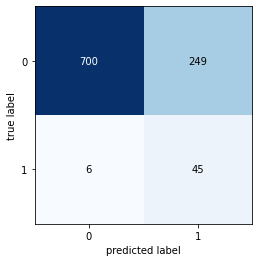

In [72]:
plot_confusion_matrix(confusion_matrix(pred,test_y))

In [73]:
print(classification_report(pred,test_y))

              precision    recall  f1-score   support

           0       0.99      0.74      0.85       949
           1       0.15      0.88      0.26        51

    accuracy                           0.74      1000
   macro avg       0.57      0.81      0.55      1000
weighted avg       0.95      0.74      0.82      1000

